### Full Name : Ehsan Hassanbeygi
### Student Number : 402211723
___

## P1: Introduction (5 points)
The dataset comprises various independent variables serving as predictors for loan results and one dependent variable, "Loan_Status." The independent variables include Gender, Marital status, Dependents, and so on. Initially, we conduct data exploration to understand the dataset better. Then, we do some data preprocessing to ready the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The cell below will download the dataset.

In [2]:
# !gdown 1sG5yPXWK7a6wFlsVc2XCjNkwCxdcsstM

TODO: Load the dataset as a dataframe. Check for duplicate rows and if there are any, delete them. Display the first 10 rows. (5 points)

In [3]:
df = pd.read_csv('Loan_Data.csv')
df = df.drop_duplicates()
print('duplicates exist' if any(df.duplicated()) else 'no duplicates')
df.head(10)


no duplicates


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

## P2: Data Exploration (18 points)
In this section, we perform some data exploration to get a better understanding of the data.

TODO: Display the count of each unique value in the 'property_area' column. (3 points)

In [4]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

TODO: Plot the correlation between different features. (use sns.heatmap) (3 points)

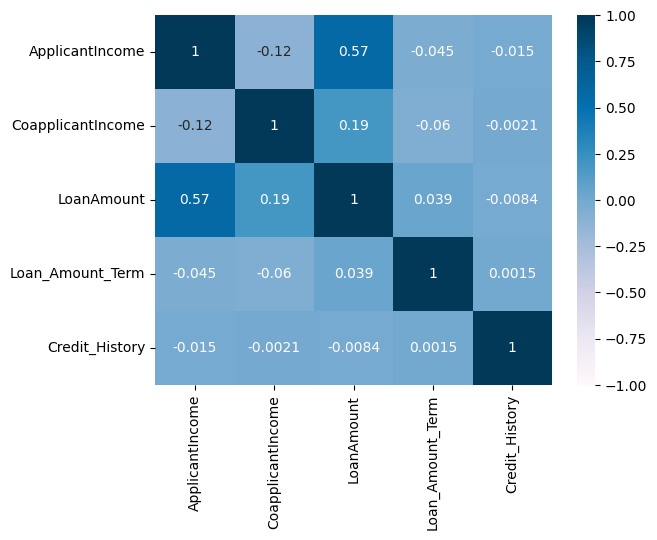

In [5]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1,
            cmap='PuBu', annot=True)
plt.show()

TODO: Plot a bar chart combining the 'Gender' and 'Loan_Status' columns (hint: use crosstab in pandas). Additionally, plot count plots for the 'Married' and 'Self_Employed' columns. (3 points)

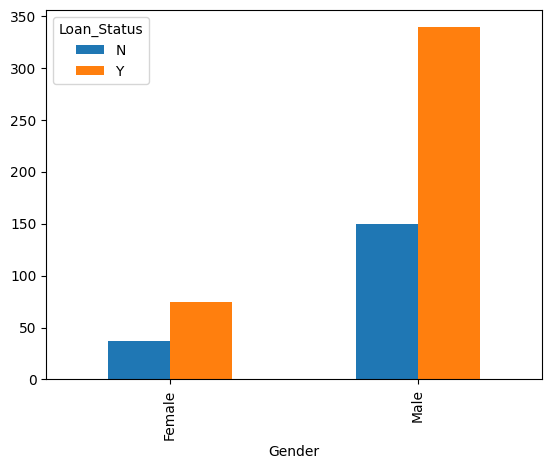

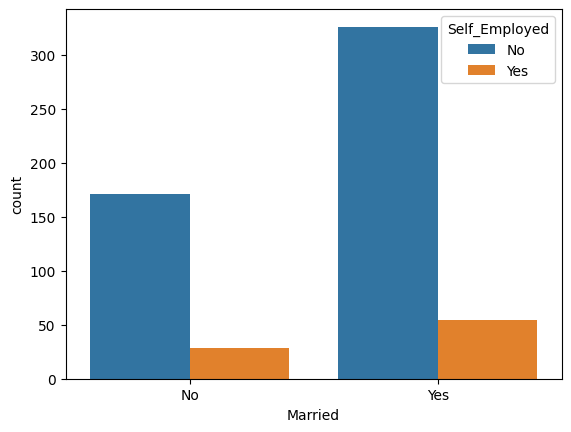

In [6]:
pd.crosstab(df['Gender'], df['Loan_Status']).plot.bar()
plt.show()
sns.countplot(df, x='Married', hue='Self_Employed')
plt.show()

TODO: Plot a pie chart for the 'Education' column. (3 points)

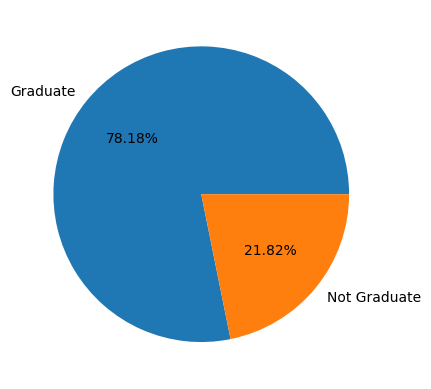

In [7]:
plt.pie(df['Education'].value_counts(),
        labels=df['Education'].value_counts().index,
        autopct='%.2f%%')
plt.show()

TODO: Plot a box plot for the combination of 'Loan_Status' and 'ApplicantIncome' columns. (3 points)

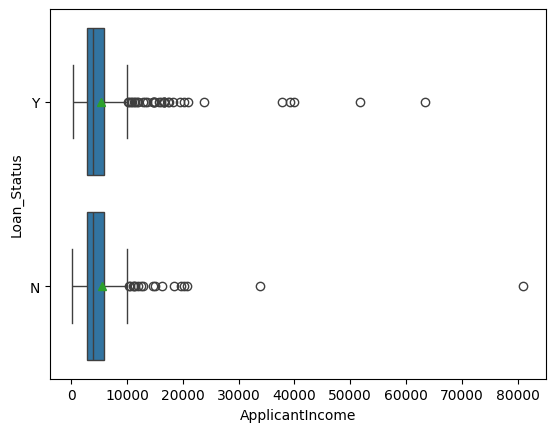

In [8]:
sns.boxplot(data=df, x='ApplicantIncome', y='Loan_Status', showmeans=True)
plt.show()

TODO: Plot a histogram of the 'ApplicantIncome' column with 10 bins. (3 points)

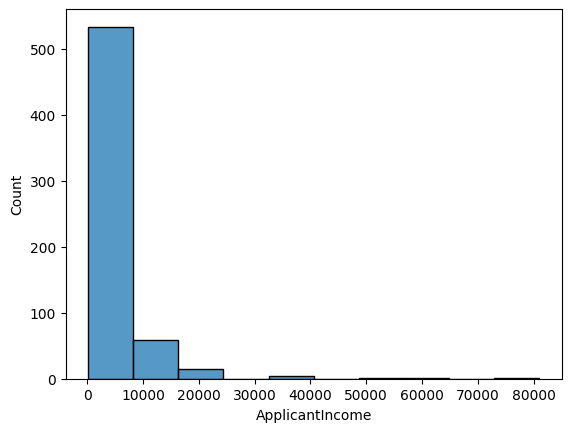

In [9]:
sns.histplot(df['ApplicantIncome'], bins=10)
plt.show()

## P3: Pre-processing (20 points)
In this section, we perform some pre-processing to make the data ready for the model.

TODO: Check for any null value. (2 point)

In [10]:
print('null values exist' if df.isna().values.any() else 'no null values')

null values exist


TODO: As you can observe, there are some null values. Given the significance of credit history for loan status prediction, we cannot impute null values for this specific column. Therefore, delete all rows containing null values in the 'credit history' column. For other columns, fill null entries with the mode for non-float/int columns and with the mean for float/int columns. (8 points)

In [11]:
df = df.dropna(subset=['Credit_History'])

for numeric_column in df.select_dtypes(include=np.number).columns:
    df[numeric_column] = df[numeric_column].fillna(df[numeric_column].mean())

for categorical_column in df.select_dtypes(exclude=np.number).columns:
    df[categorical_column] = df[categorical_column].fillna(df[categorical_column].mode()[0])

TODO: There are some columns that are entirely independent of our dependent variable, such as Loan_ID. Please drop this column. (2 points)

In [12]:
df = df.drop(columns=['Loan_ID'])

TODO: Separate the data into independent variables and the target variable. (1 point)

In [13]:
x = df.loc[:, df.columns.difference(['Loan_Status'])]
y = df.loc[:, 'Loan_Status']

TODO: Use LabelEncoder to transform categorical variables into numeric variables. (3 points)

In [14]:
from sklearn.preprocessing import LabelEncoder

for categorical_column in x.select_dtypes(exclude=np.number).columns:
    x[categorical_column] = LabelEncoder().fit_transform(x[categorical_column])

y = y.replace(to_replace={'N': 0, 'Y': 1})

TODO: Use StandardScaler for independant variables. (3 points)

In [15]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

TODO: Divide data to train and test. (1 point)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False)

## P3: SKLearn Regression Model (10 points)

In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn` (6 points). Then use `sklearn`'s confusion matrix to check the result. (4 points)

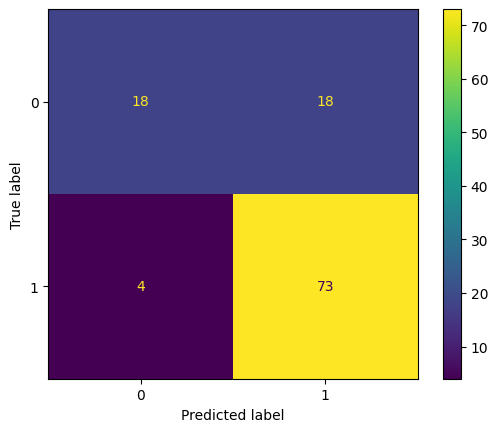

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

skl_model = LogisticRegression(random_state=42).fit(x_train, y_train)
y_hat_test = skl_model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_hat_test)).plot()
plt.show()

## P4: Custom Regression Model (32 points)

TODO: Imeplement the Logistic Regression model. Complete these methods: `loss`, `loss_derivative`, `predict` and for loop of fit function. (27 points)

In [18]:
class GDLogisticRegression:
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        self.N = n_features
        self.beta = np.zeros((self.N+1, 1))
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum

    def loss(self, X, y):
        sigmoid = 1 / (1 + np.exp(-np.dot(X, self.beta))).reshape(-1, 1)
        return -np.mean(y * np.log(sigmoid) + 
                        (1 - y) * np.log(1 - sigmoid))

    def loss_derivative(self, X, y):
        sigmoid = 1 / (1 + np.exp(-np.dot(X, self.beta))).reshape(-1, 1)

        # chain rule
        derivative = (sigmoid - y) / (sigmoid * (1 - sigmoid))
        derivative *= 1 / len(sigmoid)
        derivative = derivative.T * (sigmoid * (1 - sigmoid)).T
        derivative = np.dot(derivative, X).T

        # alternative way to calculate derivative
        # derivative = np.dot(X.T, (sigmoid - y))

        return derivative

    def predict(self, X_test, threshold=0.5):
        X_test_new = np.concatenate(
            (X_test, np.ones((X_test.shape[0], 1))), axis=1)
        p = 1 / (1 + np.exp(-np.dot(X_test_new, self.beta)))
        p[p >= threshold] = 1
        p[p < threshold] = 0
        return p

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
        y_train_new = np.array(y_train).reshape(-1, 1)
        last_loss = 0
        momentum = np.zeros((self.N+1, 1))
        for _ in range(self.max_iter):
            loss = self.loss(X_train_new, y_train_new)
            if abs(loss - last_loss) <= self.tol:
                break
            derivative = self.loss_derivative(X_train_new, y_train_new)
            momentum = self.momentum * momentum + derivative
            self.beta -= self.lr * momentum
            last_loss = loss

TODO: Predict the "Outcome" for the testing samples. (5 points)

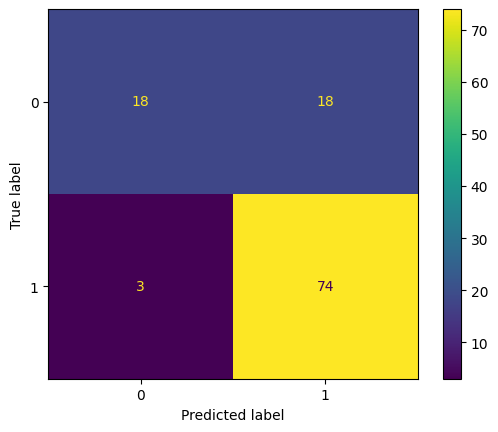

In [19]:
model = GDLogisticRegression(n_features=x_train.shape[1])
model.fit(x_train, y_train)
y_hat_test = model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_hat_test)).plot()
plt.show()

# P5: Evaluation (15 points)

TODO: Calculate `precision`, `recall`, and `f1-score macro` using your own code. (Search what f1-score and recall are) **(each part 5 points)**

In [20]:
def precision(y_true, y_pred):
    y_true_reshaped = np.asarray(y_true).reshape(-1,1)
    y_pred_reshaped = np.asarray(y_pred).reshape(-1,1)
    tp = ((y_true_reshaped == 1) & (y_pred_reshaped == 1)).sum()
    fp = ((y_true_reshaped == 0) & (y_pred_reshaped == 1)).sum()
    return tp / (tp + fp)


def recall(y_true, y_pred):
    y_true_reshaped = np.asarray(y_true).reshape(-1,1)
    y_pred_reshaped = np.asarray(y_pred).reshape(-1,1)
    tp = ((y_true_reshaped == 1) & (y_pred_reshaped == 1)).sum()
    fn = ((y_true_reshaped == 1) & (y_pred_reshaped == 0)).sum()
    return tp / (tp + fn)


def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r)


print(f'precision = {precision(y_test, y_hat_test)}')
print(f'recall = {recall(y_test, y_hat_test)}')
print(f'f1-score = {f1_score(y_test, y_hat_test)}')

precision = 0.8043478260869565
recall = 0.961038961038961
f1-score = 0.8757396449704141
